In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
train_df.isnull().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [5]:
fulldata = pd.concat([train_df, test])

In [6]:
fulldata.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,0-17,A,F,0,10,3,9.842329,12.668243,P00069042,8370.0,2,1000001
1,0-17,A,F,0,10,1,6.000000,14.000000,P00248942,15200.0,2,1000001
2,0-17,A,F,0,10,12,9.842329,12.668243,P00087842,1422.0,2,1000001
3,0-17,A,F,0,10,12,14.000000,12.668243,P00085442,1057.0,2,1000001
4,55+,C,M,0,16,8,9.842329,12.668243,P00285442,7969.0,4+,1000002


In [9]:
train_df['Product_Category_2'].isnull().value_counts()

False    376430
True     173638
Name: Product_Category_2, dtype: int64

In [10]:
train_df['Product_Category_3'].isnull().value_counts()

True     383247
False    166821
Name: Product_Category_3, dtype: int64

In [7]:
#handling the missing values in Product_Category_2 &3 variables
train_df['Product_Category_2'] = train_df['Product_Category_2'].fillna(train_df['Product_Category_2'].mean())
train_df['Product_Category_3'] = train_df['Product_Category_3'].fillna(train_df['Product_Category_3'].mean())
test['Product_Category_2'] = test['Product_Category_2'].fillna(test['Product_Category_2'].mean())
test['Product_Category_3'] = test['Product_Category_3'].fillna(test['Product_Category_3'].mean())
fulldata['Product_Category_2'] = fulldata['Product_Category_2'].fillna(fulldata['Product_Category_2'].mean())
fulldata['Product_Category_3'] = fulldata['Product_Category_3'].fillna(fulldata['Product_Category_3'].mean())

In [12]:
train_df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [13]:
train_df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [14]:
train_df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [16]:
train_df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [ ]:
#Visualization

In [30]:
train_df.isnull().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2            False
Product_Category_3            False
Purchase                      False
dtype: bool

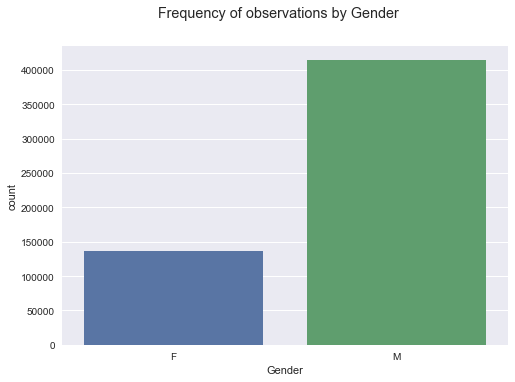

In [35]:
#Gender
#given that gender is a categorical variable, we use a countplot to visualize it
#we always plot the variable of interest on the x axis, and the count or frequency on the y axis
sns.countplot(x='Gender', data = train_df)
plt.suptitle('Frequency of observations by Gender')
plt.show()

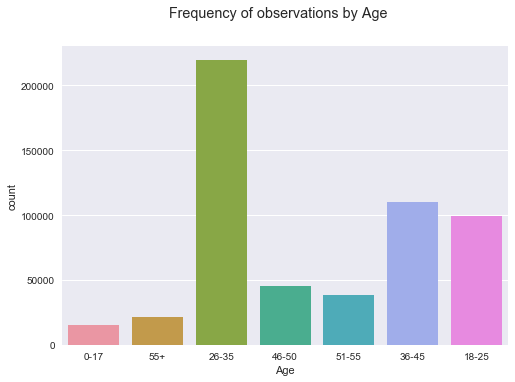

In [38]:
#Age
#given that gender is a categorical variable, we use a countplot to visualize it
#we always plot the variable of interest on the x axis, and the count or frequency on the y axis
sns.countplot(x='Age', data = train_df)
plt.suptitle('Frequency of observations by Age')
plt.show()

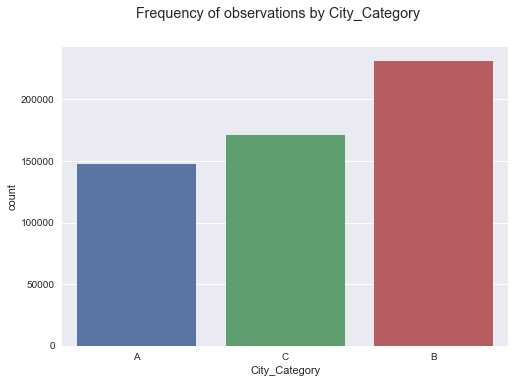

In [40]:
#City_Category
sns.countplot(x='City_Category', data = train_df)
plt.suptitle('Frequency of observations by City_Category')
plt.show()

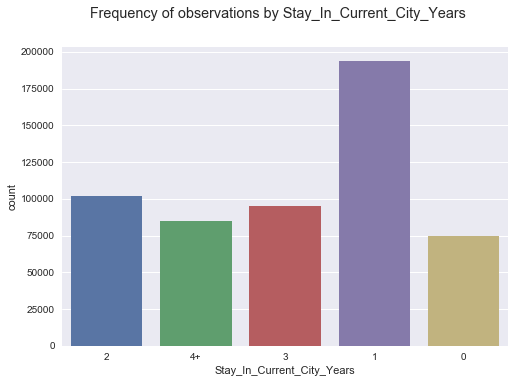

In [41]:
#Stay_In_Current_City_Years
sns.countplot(x='Stay_In_Current_City_Years', data = train_df)
plt.suptitle('Frequency of observations by Stay_In_Current_City_Years')
plt.show()

In [44]:
train_df['Age'].describe()

count     550068
unique         7
top        26-35
freq      219587
Name: Age, dtype: object

In [19]:
train_df[['Gender', 'Purchase']].groupby(['Gender'], as_index=False).mean().sort_values(by='Purchase', ascending=False)

,Gender,Purchase
1,M,9437.526040
0,F,8734.565765


In [17]:
train_df[['Age', 'Purchase']].groupby(['Age'], as_index=False).mean().sort_values(by='Purchase', ascending=False)

,Age,Purchase
5,51-55,9534.808031
6,55+,9336.280459
3,36-45,9331.350695
2,26-35,9252.690633
4,46-50,9208.625697
1,18-25,9169.663606
0,0-17,8933.464640


In [16]:
train_df[['Occupation', 'Purchase']].groupby(['Occupation'], as_index=False).mean().sort_values(by='Purchase', ascending=False)

,Occupation,Purchase
17,17,9821.478236
12,12,9796.640239
15,15,9778.891163
8,8,9532.592497
14,14,9500.702772
7,7,9425.728223
16,16,9394.464349
5,5,9333.149298
13,13,9306.351061
6,6,9256.535691


In [15]:
train_df[['City_Category', 'Purchase']].groupby(['City_Category'], as_index=False).mean().sort_values(by='Purchase', ascending=False)

,City_Category,Purchase
2,C,9719.920993
1,B,9151.300563
0,A,8911.939216


In [14]:
train_df[['Stay_In_Current_City_Years', 'Purchase']].groupby(['Stay_In_Current_City_Years'], as_index=False).mean().sort_values(by='Purchase', ascending=False)

,Stay_In_Current_City_Years,Purchase
2,2,9320.429810
3,3,9286.904119
4,4+,9275.598872
1,1,9250.145923
0,0,9180.075123


In [13]:
train_df[['Marital_Status', 'Purchase']].groupby(['Marital_Status'], as_index=False).mean().sort_values(by='Purchase', ascending=False)

,Marital_Status,Purchase
0,0,9265.907619
1,1,9261.174574


In [11]:
train_df[['Product_Category_2', 'Purchase']].groupby(['Product_Category_2'], as_index=False).mean().sort_values(by='Purchase', ascending=False)

,Product_Category_2,Purchase
9,10.000000,15648.729543
0,2.000000,13619.356401
4,6.000000,11503.551379
1,3.000000,11235.359570
14,15.000000,10357.077691
15,16.000000,10295.681933
6,8.000000,10273.259518
2,4.000000,10215.192001
12,13.000000,9683.352388
16,17.000000,9421.576577


In [11]:
train_df[['Product_Category_2', 'Purchase']].groupby(['Product_Category_2'], as_index=False).mean().sort_values(by='Purchase', ascending=False)

,Product_Category_2,Purchase
9,10.000000,15648.729543
0,2.000000,13619.356401
4,6.000000,11503.551379
1,3.000000,11235.359570
14,15.000000,10357.077691
15,16.000000,10295.681933
6,8.000000,10273.259518
2,4.000000,10215.192001
12,13.000000,9683.352388
16,17.000000,9421.576577


In [12]:
train_df[['Product_Category_3', 'Purchase']].groupby(['Product_Category_3'], as_index=False).mean().sort_values(by='Purchase', ascending=False)

,Product_Category_3,Purchase
0,3.000000,13939.696574
6,10.000000,13505.813441
3,6.000000,13194.311043
10,13.000000,13185.118703
4,8.000000,13024.918882
12,15.000000,12339.369900
2,5.000000,12117.786889
7,11.000000,12091.437673
13,16.000000,11981.890642
14,17.000000,11769.943001


In [48]:
# create dummy variables for Age
age_dummy_train_df = pd.get_dummies(train_df['Age'])
train_df = train_df.join(age_dummy_train_df)

age_dummy_test = pd.get_dummies(test['Age'])
test = test.join(age_dummy_test)

train_df.drop(['Age'], axis=1,inplace=True)
test.drop(['Age'], axis=1,inplace=True)

In [18]:
# create dummy variables for Gender
Gender_dummy_train_df = pd.get_dummies(train_df['Gender'])
train_df = train_df.join(Gender_dummy_train_df)

Gender_dummy_test = pd.get_dummies(test['Gender'])
test = test.join(Gender_dummy_test)

train_df.drop(['Gender'], axis=1,inplace=True)
test.drop(['Gender'], axis=1,inplace=True)

In [19]:
# create dummy variables for City_Category
City_Category_dummy_train_df = pd.get_dummies(train_df['City_Category'])
train_df = train_df.join(City_Category_dummy_train_df)

City_Category_dummy_test = pd.get_dummies(test['City_Category'])
test = test.join(City_Category_dummy_test)

train_df.drop(['City_Category'], axis=1,inplace=True)
test.drop(['City_Category'], axis=1,inplace=True)

In [20]:
# create dummy variables for Stay_In_Current_City_Years
Stay_In_Current_City_Years_dummy_train_df = pd.get_dummies(train_df['Stay_In_Current_City_Years'])
train_df = train_df.join(Stay_In_Current_City_Years_dummy_train_df)

Stay_In_Current_City_Years_dummy_test = pd.get_dummies(test['Stay_In_Current_City_Years'])
test = test.join(Stay_In_Current_City_Years_dummy_test)

train_df.drop(['Stay_In_Current_City_Years'], axis=1,inplace=True)
test.drop(['Stay_In_Current_City_Years'], axis=1,inplace=True)

In [21]:
train_df.head()

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,0-17,18-25,...,F,M,A,B,C,0,1,2,3,4+
0,1000001,P00069042,10,0,3,9.842329,12.668243,8370,1,0,...,1,0,1,0,0,0,0,1,0,0
1,1000001,P00248942,10,0,1,6.000000,14.000000,15200,1,0,...,1,0,1,0,0,0,0,1,0,0
2,1000001,P00087842,10,0,12,9.842329,12.668243,1422,1,0,...,1,0,1,0,0,0,0,1,0,0
3,1000001,P00085442,10,0,12,14.000000,12.668243,1057,1,0,...,1,0,1,0,0,0,0,1,0,0
4,1000002,P00285442,16,0,8,9.842329,12.668243,7969,0,0,...,0,1,0,0,1,0,0,0,0,1


In [27]:
train_df.isnull().any()

User_ID               False
Product_ID            False
Occupation            False
Marital_Status        False
Product_Category_1    False
Product_Category_2    False
Product_Category_3    False
Purchase              False
0-17                  False
18-25                 False
26-35                 False
36-45                 False
46-50                 False
51-55                 False
55+                   False
F                     False
M                     False
A                     False
B                     False
C                     False
0                     False
1                     False
2                     False
3                     False
4+                    False
dtype: bool